In [1]:
##Do the necessary imports
import pandas as pd
##Os for getting list of files in a list
from os import walk
##mplsoccer for the readily available football pitch
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt


In [2]:
##Read in one of the CSVs to have a look at the columns
liv_atm = pd.read_csv('lic_atm.csv')

In [3]:
liv_atm.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,satisfiedEventsTypes/13,satisfiedEventsTypes/14,qualifiers/12/value,isGoal,qualifiers/13/type/value,qualifiers/13/type/displayName,cardType/value,cardType/displayName,satisfiedEventsTypes/15,satisfiedEventsTypes/16
0,2190583061,2,0,0.0,63,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2190583063,2,0,0.0,26,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2190583069,3,0,1.0,63,50.0,50.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2190583073,4,0,2.0,63,34.7,41.8,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2190583079,5,0,4.0,63,36.6,17.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
##Store the names of all the files in the current folder in the list
f = []
for (dirpath, dirnames, filenames) in walk("C:/Users/tammy/Machine_Learning/FOOTBALL ANALYSIS/UCL 20-21/Klopp"):
    f.extend(filenames)
    break

In [5]:
##Make sure that the list only has csv files in it.Remove all the other files from the list. Eg. jpg,ipynb
##Hint : Just find a way to remove the files other than csv extension.
f = f[:-1]

In [11]:
len(f)

35

In [12]:
##Create an initial empty dataframe with column names same as the one we opened earlier
df = pd.DataFrame(columns = liv_atm.columns)
##Loop through the f. F has all the csv file paths stored in it.
for i in range(len(f)) :
    ##Create a temp dataframe for the ith file in f.
    temp = pd.read_csv(f[i])
    ##Concatenate it wwith our main data frame.
    df = pd.concat([df,temp])

In [14]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,...,isOwnGoal,qualifiers/15/value,qualifiers/16/type/value,qualifiers/16/type/displayName,qualifiers/16/value,qualifiers/17/type/value,qualifiers/17/type/displayName,satisfiedEventsTypes/17,satisfiedEventsTypes/18,satisfiedEventsTypes/19
0,2190583061,2,0,0.0,63,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2190583063,2,0,0.0,26,0.0,0.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2190583069,3,0,1.0,63,50.0,50.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2190583073,4,0,2.0,63,34.7,41.8,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2190583079,5,0,4.0,63,36.6,17.0,0,1,FirstHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,1.81398e+09,682,94,46.0,26,35.3,29.4,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,1.16233e+09,683,94,48.0,26,45.1,17.6,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,1.26591e+09,684,94,49.0,26,45.1,17.6,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,1.31157e+09,923,94,55.0,30,20.9,100.0,97,2,SecondHalf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##Note that our dataframe has over 60,000 rows from all the matches.
##Each row represents a certain event at a certain instance in a match.
##For this particular viz., we're only concerned with goals scored by Liverpool.
##So , we'll filter our dataframe accordingly.
##1.We'll only keep goals by liverpool. Liverpool's ID is 26.
##2.We'll only keep columns - ['x' , 'y' , teamId , playerId]. x and y represent the x,y location of shot taken

In [15]:
##Filter
new_df = df[(df['type/displayName'] == 'Goal') & (df['teamId'] == 26)][['x','y','teamId' , 'playerId']]

In [16]:
##Make sure all the numerical data is type int.
new_df['playerId'] = new_df['playerId'].astype('int')
new_df

,x,y,teamId,playerId
848,89.9,50.3,26,33568
1813,94.2,51.5,26,96182
1011,97.4,57.5,26,355354
331,91.9,42.1,26,235755
625,88.8,63.8,26,235755
...,...,...,...,...
39,95.9,56.4,26,96182
441,94.9,56.1,26,109915
565,95.9,47.6,26,96182
22,88.5,50.0,26,108226


In [29]:
##Note that our dataframe doesn't have player names yet.
##We'll write a function that will create a column called player.
##We will get the values for player bby applying the following function on the column playerID.
##Note that I have manually found the player names for the corresponding ID from whoscored.com
def get_name(x) :
    if x == 95408 :
        return "Virgil Van Dijk"
    if x == 33568 :
        return "Gini Wijnaldum"
    if x == 96182 :
        return "Roberto Firmino"
    if x == 335354 :
        return "Curtis Jones"
    if x == 235755 :
        return "Diogo Jota"
    if x == 108226 :
        return "Mohammed Salah"
    if x == 109915 :
        return "Sadio Mane"
    if x == 124688 :
        return "Divock Origi"
    else :
        return "Default"
    

new_df['player'] = new_df['playerId'].apply(lambda x : get_name(x))

In [30]:
##The data we have is scaled for values x=(0,100) and y=(0,100)
##But the pitch we'll draw has dimension x=(0,120) and y=(0,80)
##So we'll scale our x and y values accordingly.
new_df['x'] = new_df['x']*1.2
new_df['y'] = new_df['y']*0.8

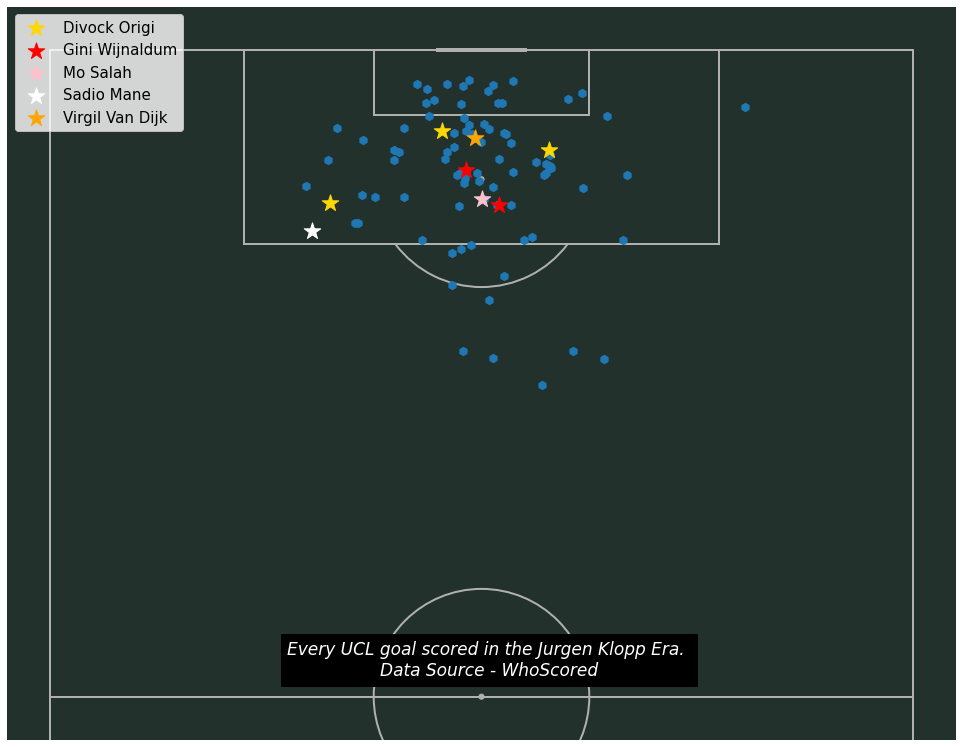

In [56]:
##Create the instance of the mplsoccer pitch.
pitch = Pitch(figsize=(17,15) , pitch_type='statsbomb', pitch_color='#22312b'  , orientation = 'vertical' , view='half')
##Create a figure
fig = plt.figure(figsize=(17,15))
##Add a subplot
ax = fig.add_subplot()
##Draw the created pitch on the created subplot
pitch.draw(ax)

##First we'll plot all the goalss from the dataframe.
plt.scatter(y = new_df['x'] , x = new_df['y'] , marker = 'h' , s = 70)

##Now, we'll plot some special goals with different markers and size for highlighting them.

##Goals by Origi
origi = plt.scatter(y = new_df[new_df['player'] == 'Divock Origi']['x'] , x = new_df[new_df['player'] == 'Divock Origi']['y'] , marker = '*' , color='gold' , s = 300)

##For Wijnaldum
gini = plt.scatter(y = [105.6 , 108.84] , x = [38.36 , 41.44] , marker = '*' , color='red' , s = 300 , label = 'Gini Wijnaldum')

##For Salah
salah = plt.scatter(y = [106.2 ] , x = [40 ] , marker = '*' , color='pink' , s = 300 , label = 'Mohammed Salah')

##For Mane
mane = plt.scatter(y = [103.2 ] , x = [55.68 ] , marker = '*' , color='white' , s = 300 , label = 'Sadio Mane')

##For VVD
virgil = plt.scatter(y = [111.84 ] , x = [40.56 ] , marker = '*' , color='orange' , s = 300 , label = 'Virgil Van Dijk')

##We'll add legend for the special goals for the goals we just plotted
plt.legend((origi , gini , salah , mane , virgil),
           ('Divock Origi', 'Gini Wijnaldum', 'Mo Salah', 'Sadio Mane', 'Virgil Van Dijk'),
           
           loc='upper left',
           ncol=1,
           fontsize=15)

##Add in optional text
plt.text( s = "Every UCL goal scored in the Jurgen Klopp Era. \nData Source - WhoScored" , x = 58 , y = 62 , ma='center' , color = 'white' , backgroundcolor = 'black', style = 'italic' , size = 17)


##Make sure the axis are alligned correct.
ax.invert_xaxis()

##Save the file.
plt.savefig('Klopp Era.jpg' , dpi = 700)
